# Problem Set 4, due May 16 at 11:59am, mid-day, noon.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 3.3 will be relatively painless or incredibly painful. 
* Part 3 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [279]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
from sklearn import linear_model
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 

from sklearn.datasets import load_boston
bdata = load_boston()
bdata.feature_names = np.append(bdata.feature_names, 'MEDV')
boston = pd.DataFrame(bdata.data)
boston['MEDV'] = bdata.target
boston.columns = bdata.feature_names[:]

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  **Interpret your results.**

In [280]:
one = smf.ols(formula='MEDV ~ RM', data=boston).fit()
oneCoeff = round(one.params[1],2)
oneInt = round(one.params[0],2)
oneReg = one.predict()
one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 17 May 2016   Prob (F-statistic):           2.49e-74
Time:                        06:32:40   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
two = smf.ols(formula='MEDV ~ RM + np.power(RM, 2)', data=boston).fit()
twoCoeff = round(two.params[1],2)
twoCoeffS = round(two.params[2],2)
twoInt = round(two.params[0],2)
twoReg = two.predict()
two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.4
Date:                Tue, 17 May 2016   Prob (F-statistic):           1.46e-87
Time:                        06:32:40   Log-Likelihood:                -1639.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          66.0588     12.104      5.458      0.000        42.278    89.839
RM                -22.6433      3.754     -6.031      0.000       -30.019   -15.267
np.power(RM, 2)     2.4701      0.291      8.502      0.000         1.899     3.041
==============================================================================
Omnibus:                       82.173   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.337
Skew:                           0.224   Prob(JB):                    1.29e-203
Kurtosis:                       9.642   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OBERSVATIONS

If we compare the R-squared values we can see that adding number of rooms per house squared increases the value from 0.484 to 0.548. The increase in R-squared is expected because we are fitting the data with a variable we already used (RM). But, we need to be careful of overfitting the data when adding more features because it will not fit new data well.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use k-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the k slope coefficients, and draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you observe?

In [282]:
coeffs = []
numF = 100
kf = sklearn.cross_validation.KFold(len(boston), n_folds=numF)
for train, test in kf:
    trainSet = boston.ix[train]
    testSet = boston.ix[test]
    regr = smf.ols(formula='MEDV ~ RM', data=trainSet).fit()
    coeffs.append(regr.params[1])

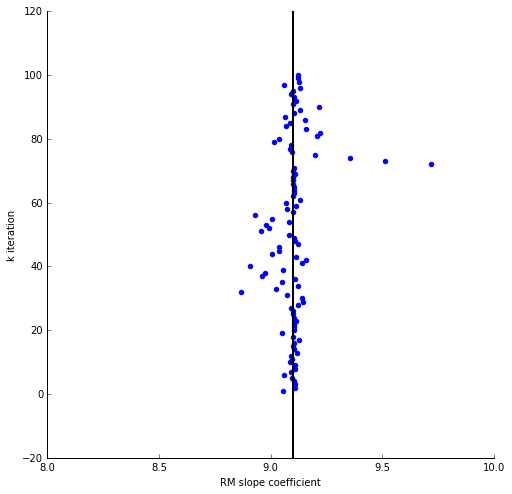

In [283]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
x = coeffs
y = range(1, numF + 1)
ax.scatter(x, y, color='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# ax.set_xlim(xmin=-1)
ax.set_xlim([8,10])
ax.axvline(x=oneCoeff, linewidth=2, color='black')

plt.ylabel('k iteration')
plt.xlabel('RM slope coefficient')
plt.show()

OBSERVATION

The slope coefficients are pretty close to the vertical line with some variation of course. 

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

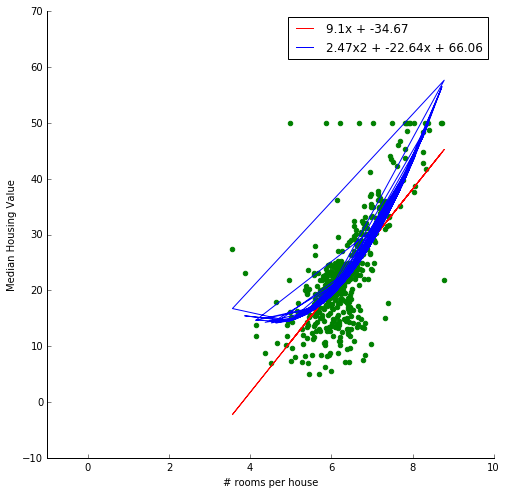

In [284]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
x = boston['RM']
y = boston['MEDV']
ax.scatter(x, y, color='green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(xmin=-1)
oneRegLine = ax.plot(x, oneReg, color='red')
twoRegLine = ax.plot(x, twoReg, color='blue')

plt.ylabel('Median Housing Value')
plt.xlabel('# rooms per house')
plt.legend([str(oneCoeff) + 'x + ' + str(oneInt), str(twoCoeffS) + 'x2 + ' + str(twoCoeff) + 'x + ' + str(twoInt)])
plt.show()

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the basic gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *
* *Hint 3: R = 0.005 is a reasonable first guess - but try some others to see how it affects your results. *

In [456]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
numIter: int
    number of iterations ran
"""
def bivariate_ols(xvalues, yvalues, R, MaxIterations, e):
    start_time = time.time()
    alpha = 0
    beta = 0
    N = len(xvalues)
    numIter = 0
    close = False
    costPrev = (1.0 / (2 * N)) * (np.sum(alpha + beta * xvalues - yvalues) ** 2)
    while MaxIterations > 0 and not close:
        alpha = alpha - (R / N) * np.sum(alpha + beta * xvalues - yvalues)
        beta = beta - (R / N) * np.sum((alpha + beta * xvalues - yvalues) * xvalues)
        cost = (1.0 / (2 * N)) * (np.sum(alpha + beta * xvalues - yvalues) ** 2)
        close = abs(cost - costPrev) <= e
        costPrev = cost
        numIter += 1
        MaxIterations -= 1

    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return alpha, beta, numIter

In [457]:
X = np.array(boston['RM'])
Y = np.array(boston['MEDV'])

In [458]:
# R = 0.01
print bivariate_ols(X, Y, 0.01, 100000, 0.00001)

Time taken: 0.73 seconds
(-33.619927856099181, 8.9369542970990032, 28931)


In [288]:
# R = 0.005
print bivariate_ols(X, Y, 0.005, 100000, 0.00001)

Time taken: 1.29 seconds
(-33.173706881458131, 8.8668004008399421, 52285)


In [289]:
# R = 0.001
print bivariate_ols(X, Y, 0.001, 100000, 0.00001)

Time taken: 0.01 seconds
(0.43759643303959861, 3.5829650199082246, 291)


In [290]:
# R = 0.05
print bivariate_ols(X, Y, 0.05, 100000, 0.00001)

Time taken: 0.21 seconds
(-34.228073037743847, 9.0325811169246251, 6929)


OBSERVATION

We se that using a R of 0.05 we get the most accurate slope and coefficient values compared to 1.1 with some of the quickest time. Interestingly, using very small values of R yields very innacurate values and a low number of iterations. This is most likely due to the way I wrote the code and because R is so small, the function we're trying to minimize changes by very little so we get a difference of less than epsilon quicker than we get accurate slope/coefficient values.

### 2.2 Data normalization

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, however, you should re-scale your features to ensure that no single feature dominates the cost function. Write a simple function to [standardize](http://en.wikipedia.org/wiki/Standard_score) a feature. * This is done for you!*

In [291]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem - see 2.2 above for an example.*

In [453]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalues, yvalues, R, MaxIterations, e):
    start_time = time.time()
    alpha = 0
    beta_array = np.zeros(xvalues.shape[1])
    N = xvalues.shape[0]
    numIter = 0
    close = False
    costPrev = (1.0 / (2 * N)) * (np.sum(alpha + np.dot(beta_array, xvalues.T) - yvalues) ** 2)
    while MaxIterations > 0 and not close:
        alpha = alpha - (R / N) * np.sum(alpha + np.dot(beta_array, xvalues.T) - yvalues)
        beta_array = beta_array - (R / N) * np.sum(np.dot(alpha + np.dot(beta_array, xvalues.T) - yvalues, xvalues))
        cost = (1.0 / (2 * N)) * (np.sum(alpha + np.dot(beta_array, xvalues.T) - yvalues) ** 2)
        close = abs(cost - costPrev) <= e
        costPrev = cost
        numIter += 1
        MaxIterations -= 1
    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return alpha, beta_array, numIter

In [454]:
XX = np.array(boston[['RM', 'CRIM']])

In [455]:
print multivariate_ols(standardize(XX), Y, 0.1, 100000, 0.00001)

Time taken: 0.0 seconds
(22.532413646386306, array([ 1.82290361,  1.82290361]), 104)


In [295]:
print multivariate_ols(standardize(XX), Y, 0.01, 100000, 0.00001)

Time taken: 0.05 seconds
(22.531423464569595, array([ 1.82290318,  1.82290318]), 965)


In [296]:
print multivariate_ols(standardize(XX), Y, 0.001, 100000, 0.00001)

Time taken: 0.3 seconds
(22.528367183771962, array([ 1.82290064,  1.82290064]), 8528)


In [297]:
print multivariate_ols(standardize(XX), Y, 0.0001, 100000, 0.00001)

Time taken: 2.26 seconds
(22.518750194167655, array([ 1.82288543,  1.82288543]), 73793)


OBSERVATIONS

All runs of the standardized x values (RM, CRIM) with varying learning rates, R, yeilded very similar alpha and beta array values. Larger learning rate values were much quicker due to less iterations and smaller R values took longer due to more iterations. I can't speak for what the impacts of standardization were because I have not yet looked at it with unstandardized data.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [298]:
print 'R=0.1'
print multivariate_ols(XX, Y, 0.1, 100000, 0.00001)
print
print 'R=0.01'
print multivariate_ols(XX, Y, 0.01, 100000, 0.00001)
print
print 'R=0.001'
print multivariate_ols(XX, Y, 0.001, 100000, 0.00001)
print
print 'R=0.0001'
print multivariate_ols(XX, Y, 0.0001, 100000, 0.00001)

R=0.1
Time taken: 4.42 seconds
(nan, array([ nan,  nan]), 100000)

R=0.01
Time taken: 0.08 seconds
(26.109522985884578, array([-0.36229228, -0.36229228]), 2010)

R=0.001
Time taken: 0.58 seconds
(26.098382030904848, array([-0.36163929, -0.36163929]), 17489)

R=0.0001
Time taken: 3.46 seconds
(25.73097998789202, array([-0.34013396, -0.34013396]), 100000)


OBSERVATIONS

Right away we see for R=0.1 that the algorithim probably overshot the minimum and never converges even after 100,000 iterations. The runtime of R=0.01, 0.001 are roughly twice as long as it is using the standardized data. We see a difference in convergence for the alpha values which were around 22.53 but are now 26.1 and different beta values as well. We expect difference values of convergence because 'CRIM' values have a much higher range than 'RM' and it would not be accurately represented within the cost function as 'CRIM' would have more weight than 'RM'.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, make sure to use the standardized version of your features in everything that follows.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again.  Use 10-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three coefficients for each fold, corresponding to the intercept and the two coefficients for CRIM and RM). 

How do your estimated coefficients from cross-validation compare to the ones you estimated in 2.3 above? How do they compare to the ones estimated using standard packages?

In [302]:
numF = 10
coeffs31 = np.empty([numF, 3])
kf = sklearn.cross_validation.KFold(len(Y), n_folds=numF)
count = 0
for train, test in kf:
    trainSet = boston.ix[train]
    Y31 = np.array(trainSet['MEDV'])
    XX31 = standardize(np.array(trainSet[['RM', 'CRIM']]))
    a, b, i = multivariate_ols(XX31, Y31, 0.001, 100000, 0.00001)
    coeffs31[count][0] = a
    coeffs31[count][1] = b[0]
    coeffs31[count][2] = b[1]
    count += 1
print coeffs31

Time taken: 0.28 seconds
Time taken: 0.26 seconds
Time taken: 0.3 seconds
Time taken: 0.28 seconds
Time taken: 0.29 seconds
Time taken: 0.27 seconds
Time taken: 0.27 seconds
Time taken: 0.28 seconds
Time taken: 0.27 seconds
Time taken: 0.28 seconds
[[ 22.75751634   1.76883939   1.76883939]
 [ 22.3282857    1.81923496   1.81923496]
 [ 23.02674826   1.76482941   1.76482941]
 [ 21.55312231   1.40124746   1.40124746]
 [ 21.94499041   1.58476742   1.58476742]
 [ 21.53356143   1.36260822   1.36260822]
 [ 22.60321701   1.83476313   1.83476313]
 [ 23.08676893   2.46486851   2.46486851]
 [ 23.50628649   2.34189875   2.34189875]
 [ 22.93633283   1.85707023   1.85707023]]


OBSERVATIONS

In general, the alpha values and the values of the beta arrays after 10-fold CV are comparable to the values we got in 2.3. There is of course some variation in the data with high alphas of 23.5 and lows of 21.5 and high betas of 2.46 and low betas of 1.4 but this is expected because we're only using 90% of the data as training data per fold.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Report the average 10-fold cross-validated RMSE, separately for the training data and for the testing data. 

In other words, run 10-fold cross-validation. In each of the 10 iterations, you will fit a model on 90% of the data. Use that model to generate predicted outputs for 100% of the data. For that iteration, the training RMSE is the RMSE calculated across the (90%) training data, and the test RMSE is the RMSE calculated across the (10%) test data. The average 10-fold cross-validated RMSE is the average of the 10 iterations.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [304]:
def compute_rmse(predictions, yvalues):
    rmse = 0.0
    for pre, yval in zip(predictions, yvalues):
        rmse += (pre - yval) ** 2
    rmse /= len(predictions)
    return (rmse ** 0.5)

In [309]:
numF = 10
cumRMSE = []
kf = sklearn.cross_validation.KFold(len(Y), n_folds=numF)
count = 0
for train, test in kf:
    trainSet32 = boston.ix[train]
    testSet32 = boston.ix[test]
    Y32 = np.array(trainSet32['MEDV'])
    XX32 = standardize(np.array(trainSet32[['RM', 'CRIM']]))
    a, b, i = multivariate_ols(XX32, Y32, 0.001, 100000, 0.00001)
    Y32t = np.array(testSet32['MEDV'])
    XX32t = standardize(np.array(testSet32[['RM', 'CRIM']]))
    at, bt, it = multivariate_ols(XX32t, Y32t, 0.001, 100000, 0.00001)
    cumRMSE.append(compute_rmse([at, bt], [a, b]))
    count += 1
print 'RMSE: ' + str(np.mean(cumRMSE))

Time taken: 0.28 seconds
Time taken: 0.19 seconds
Time taken: 0.29 seconds
Time taken: 0.21 seconds
Time taken: 0.29 seconds
Time taken: 0.19 seconds
Time taken: 0.3 seconds
Time taken: 0.22 seconds
Time taken: 0.3 seconds
Time taken: 0.21 seconds
Time taken: 0.5 seconds
Time taken: 0.49 seconds
Time taken: 0.42 seconds
Time taken: 0.51 seconds
Time taken: 0.74 seconds
Time taken: 0.41 seconds
Time taken: 0.34 seconds
Time taken: 0.27 seconds
Time taken: 0.27 seconds
Time taken: 0.19 seconds
RMSE: 4.15123978092


OBSERVATIONS

The RMSE value was 4.15. This is much lower than what I had for my KNN algorithim but I'm pretty sure the algorithm wasn't 100% correct. Regardless, the RMSE is a lot lower than I had previously expected.

### Extra Credit: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: For each of the continuous features F in the original dataset, create a standardized version F_1.  Now, create polynomials up to degree 6 of each F_1: the square of F_1 (call this F_2); the cube of F_1 (call this F_3); and so forth up to F_6. If you originally had *K* features, you should now have *6K* features (i.e., we're going to ignore the original unscaled features for the remainder of this problem).

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [440]:
newBoston = boston
newBoston = newBoston.drop(['CHAS', 'RAD', 'ZN', 'MEDV'], axis=1)
newBoston.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33


In [441]:
df = pd.DataFrame()
for name in newBoston.columns.values:
    for i in range(1, 7):
        df[name + '_' + str(i)] = np.power(newBoston[name], i)
df['MEDV'] = boston['MEDV']

In [446]:
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df, test_size=0.34)

### 4.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, (over)fit your model on the training data. Using your training set, regress housing price on as many of those *6K* features as you can.  If you get too greedy, or if you did not efficiently implement your solution to 2.3, it's possible this will take a long time to compute.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 2.5 and nearest neighbors?

In [406]:
df.columns.values

array(['CRIM_1', 'CRIM_2', 'CRIM_3', 'CRIM_4', 'CRIM_5', 'CRIM_6',
       'INDUS_1', 'INDUS_2', 'INDUS_3', 'INDUS_4', 'INDUS_5', 'INDUS_6',
       'NOX_1', 'NOX_2', 'NOX_3', 'NOX_4', 'NOX_5', 'NOX_6', 'RM_1',
       'RM_2', 'RM_3', 'RM_4', 'RM_5', 'RM_6', 'AGE_1', 'AGE_2', 'AGE_3',
       'AGE_4', 'AGE_5', 'AGE_6', 'DIS_1', 'DIS_2', 'DIS_3', 'DIS_4',
       'DIS_5', 'DIS_6', 'TAX_1', 'TAX_2', 'TAX_3', 'TAX_4', 'TAX_5',
       'TAX_6', 'PTRATIO_1', 'PTRATIO_2', 'PTRATIO_3', 'PTRATIO_4',
       'PTRATIO_5', 'PTRATIO_6', 'B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6',
       'LSTAT_1', 'LSTAT_2', 'LSTAT_3', 'LSTAT_4', 'LSTAT_5', 'LSTAT_6',
       'MEDV'], dtype=object)

In [422]:
Y42 = np.array(df_train['MEDV'])
XX42 = standardize(np.array(df_train.drop(['MEDV'], axis=1)))
a, b, i = multivariate_ols(XX42, Y42, 0.001, 100000, 0.00001)

Y42t = np.array(df_test['MEDV'])
XX42t = standardize(np.array(df_test.drop(['MEDV'], axis=1)))
at, bt, it = multivariate_ols(XX42t, Y42t, 0.001, 100000, 0.00001)
print 'RMSE: ' + str(compute_rmse([a, b[0], b[1]], [at, bt[0], bt[1]]))

Time taken: 0.45 seconds
Time taken: 0.35 seconds
RMSE: 0.233801210897


OBSERVATIONS

I'm not sure if we're supposed to standardize the feature data or not. I feel like we weren't supposed to but I couldn't get beyond 2 degrees without all my alpha/beta values being NaN no matter what R, MaxIteration, or e values I passed in to the multivariate_ols function. That being said, using standardized features yielded a RMSE of 0.233. I feel as though the RMSE SHOULD be low because we are purposely overfitting the data, meaning there should be a much lower amount of error between the training and test data. Obviously overfitting data is bad because it does not generalize well to more data, but I'm thinking(hoping) that that is the point of 4.2.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [451]:
def ridge_reg(xvalues, yvalues, R, MaxIterations, e, l):
    start_time = time.time()
    alpha = 0
    beta_array = np.zeros(xvalues.shape[1])
    N = xvalues.shape[0]
    numIter = 0
    close = False
    costPrev = (1.0 / (2 * N)) * (np.sum(alpha + np.dot(beta_array, xvalues.T) - yvalues) ** 2) + l * np.sum(beta_array**2)
    while MaxIterations > 0 and not close:
        alpha = alpha - (R / N) * np.sum(alpha + np.dot(beta_array, xvalues.T) - yvalues)
        beta_array = beta_array * (1.0 - R * l / N) - (R / N) * np.sum(np.dot(alpha + np.dot(beta_array, xvalues.T) - yvalues, xvalues))
        cost = (1.0 / (2 * N)) * (np.sum(alpha + np.dot(beta_array, xvalues.T) - yvalues) ** 2) + l * np.sum(beta_array**2)
        close = abs(cost - costPrev) <= e
        costPrev = cost
        numIter += 1
        MaxIterations -= 1
    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return alpha, beta_array, numIter

In [452]:
Y43 = np.array(df_train['MEDV'])
XX43 = standardize(np.array(df_train.drop(['MEDV'], axis=1)))
a, b, i = ridge_reg(XX43, Y43, 0.001, 100000, 0.00001, 10000)

Y43t = np.array(df_test['MEDV'])
XX43t = standardize(np.array(df_test.drop(['MEDV'], axis=1)))
at, bt, it = ridge_reg(XX43t, Y43t, 0.001, 100000, 0.00001, 10000)
print 'RMSE: ' + str(compute_rmse([a, b[0], b[1]], [at, bt[0], bt[1]]))

Time taken: 0.5 seconds
Time taken: 0.43 seconds
RMSE: 0.13869012182


OBSERVATIONS

Using a high lambda value yields a higher RMSE. I'm not exactly sure what the "range" of lambda can be.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [ ]:
# Your code here

*Discuss your results here*

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot.

In [ ]:
# Your code here

*Discuss your results here*